# Import Dependencies

In [1]:
# Importing the Dependencies
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [2]:
#Importing the dataset
titanic = pd.read_csv("tested.csv")

# Exploratory Data Analysis

In [3]:
# retrieve first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# number of rows and columns
titanic.shape

(418, 12)

In [5]:
# Information about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# check the number of missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handling the missing values

In [8]:
#drop the "cabin" column from the dataset
titanic.drop(columns = "Cabin",axis = 1, inplace = True)

In [9]:
#replacing the missing values in "age" column with its mean value
titanic["Age"].fillna(titanic["Age"].median(),inplace = True)

In [10]:
#replacing the missing values in "fare" column with its mean value
titanic["Fare"].fillna(titanic["Fare"].median(),inplace = True)

In [11]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanic.dtypes.value_counts()

int64      5
object     4
float64    2
dtype: int64

In [13]:
#Some statistical measures about the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Univariant Analysis

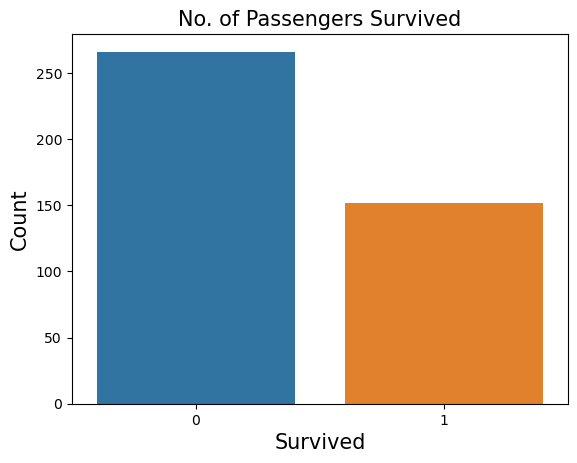

0    266
1    152
Name: Survived, dtype: int64


In [14]:
sns.countplot(data=titanic, x='Survived',order = titanic['Survived'].value_counts().index)
plt.title('No. of Passengers Survived', fontsize = 15)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()
print(titanic.Survived.value_counts())

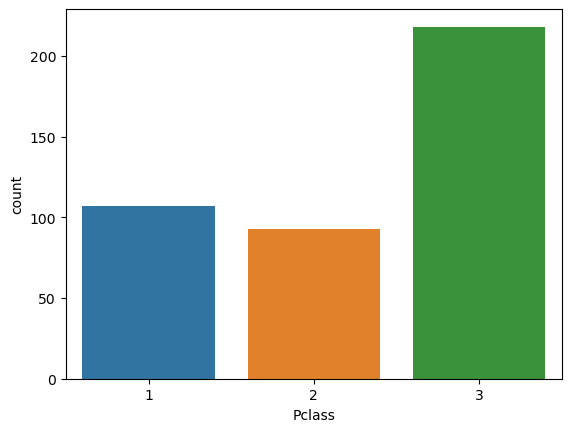

3    218
1    107
2     93
Name: Pclass, dtype: int64


In [15]:
sns.countplot(data = titanic, x= "Pclass")
plt.show()
print(titanic.Pclass.value_counts())

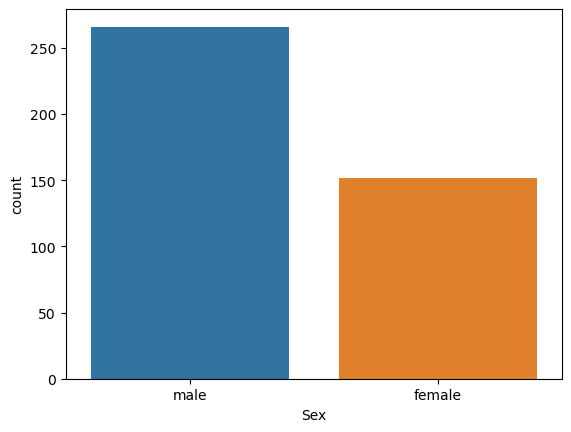

male      266
female    152
Name: Sex, dtype: int64


In [16]:
sns.countplot(data=titanic,x = "Sex")
plt.show()
print(titanic.Sex.value_counts())

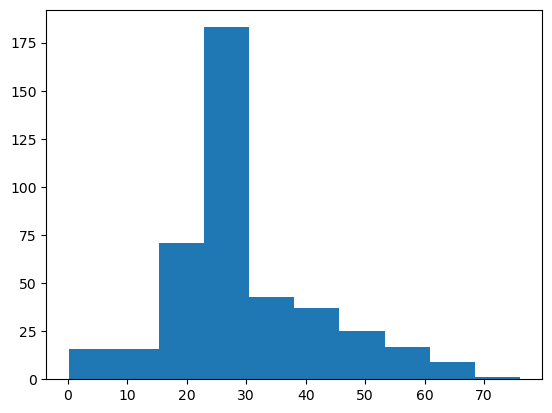

In [17]:
plt.hist(data=titanic,x = "Age")
plt.show()

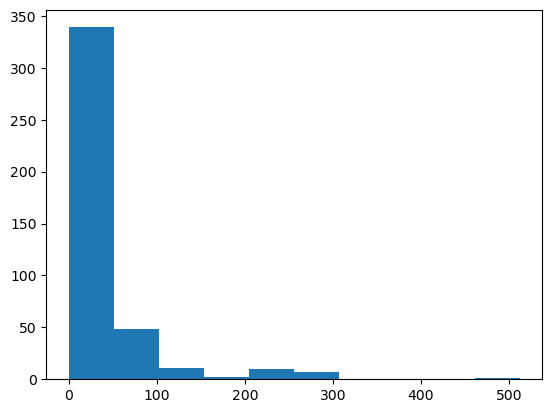

In [18]:
plt.hist(data=titanic,x = "Fare")
plt.show()

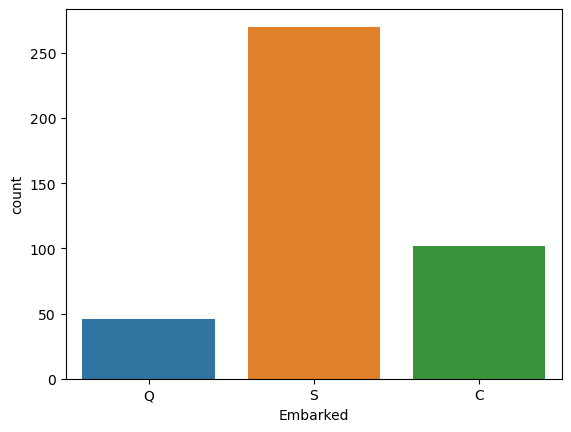

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [19]:
sns.countplot(data=titanic,x = "Embarked")
plt.show()
print(titanic.Embarked.value_counts())

# Bivariate Analysis

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


male      266
female    152
Name: Sex, dtype: int64


Sex,female,male
Survived,,
0,0,266
1,152,0


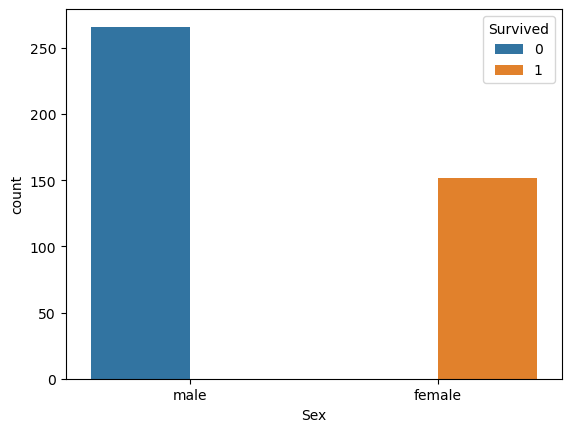

In [21]:
# number of survivors Gender wise
sns.countplot("Sex",hue="Survived",data=titanic)
print(titanic.Sex.value_counts())
pd.crosstab(titanic['Survived'],titanic['Sex'])

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


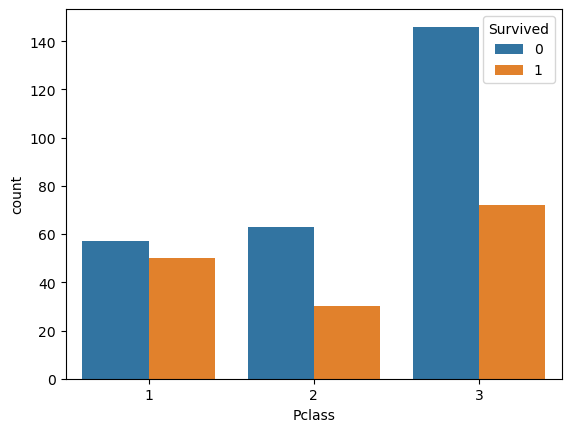

In [22]:
sns.countplot("Pclass",data=titanic,hue="Survived")
pd.crosstab(titanic["Survived"],titanic["Pclass"])

Observation: Pclass-3 passengers were died more compared to class-2 and class-1.Class-1 passengers survived mostly.

In [23]:
titanic.SibSp.value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

Embarked,C,Q,S
Survived,,,
0,62,22,182
1,40,24,88


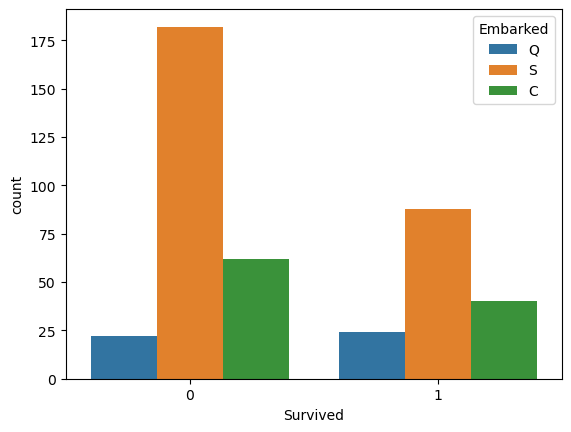

In [24]:
sns.countplot("Survived",data=titanic,hue="Embarked")
pd.crosstab(titanic["Survived"],titanic["Embarked"])

Observation: The ratio of Embarked classes to the survived classes, the Q-Embarked ratio of survival and death arealmost same.

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,195,56,8,3,3,0,1
1,88,54,6,1,1,1,1


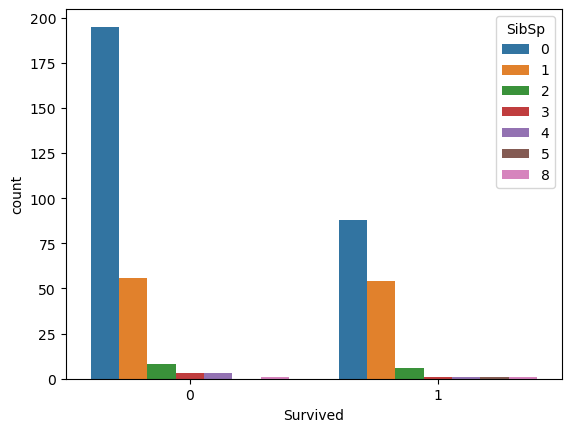

In [25]:
sns.countplot("Survived",data=titanic,hue="SibSp")
pd.crosstab(titanic["Survived"],titanic["SibSp"])

# Encoding the Categorical Columns

In [26]:
titanic.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [27]:
titanic.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [28]:
# Converting Categorical Columns
titanic.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [29]:
titanic.Embarked.value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


 # Separating Features And Target

In [31]:
X = titanic.drop(columns=["PassengerId","Survived","Name","Ticket"],axis=1)
Y = titanic["Survived"]

In [32]:
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    0  34.5      0      0    7.8292         2
1         3    1  47.0      1      0    7.0000         0
2         2    0  62.0      0      0    9.6875         2
3         3    0  27.0      0      0    8.6625         0
4         3    1  22.0      1      1   12.2875         0
..      ...  ...   ...    ...    ...       ...       ...
413       3    0  27.0      0      0    8.0500         0
414       1    1  39.0      0      0  108.9000         1
415       3    0  38.5      0      0    7.2500         0
416       3    0  27.0      0      0    8.0500         0
417       3    0  27.0      1      1   22.3583         1

[418 rows x 7 columns]


In [33]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# Splitting the data into train_data and test_data (Train_Test_Split)

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 42)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


In [36]:
print(Y.shape,Y_train.shape,Y_test.shape)

(418,) (334,) (84,)


# Model Training

# Logistic Regression

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

In [39]:
titanic.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [40]:
# prediction on train data
train_preds= model.predict(X_train)

In [41]:
# Prediction on test data
test_preds = model.predict(X_test)

In [42]:
# print Classification report of train_data
print(classification_report(Y_train,train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       118

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



In [43]:
# print classification_report of test_data
print(classification_report(Y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [44]:
train_acc = accuracy_score(Y_train,train_preds)

In [45]:
train_acc

1.0

In [46]:
test_acc = accuracy_score(Y_test,test_preds)
test_acc

1.0

# Up-Sampling the Imbalanced data

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 123)
X_train_sm,Y_train_sm = smote.fit_resample(X_train,Y_train)

In [48]:
np.unique(Y_train, return_counts = True)
np.unique(Y_train_sm, return_counts = True)

(array([0, 1], dtype=int64), array([216, 216], dtype=int64))

In [49]:
print(X_train_sm.shape,X_test.shape,Y_train_sm.shape,Y_test.shape)

(432, 7) (84, 7) (432,) (84,)


In [50]:
# Fitting the model using SMOTE
model_sm = model.fit(X_train_sm,Y_train_sm)

In [51]:
#Predictions on train
train_preds_sm = model_sm.predict(X_train_sm)

In [52]:
print(classification_report(Y_train_sm,train_preds_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [53]:
#Predictions on test
test_preds_sm = model_sm.predict(X_test)

In [54]:
print(classification_report(Y_test,test_preds_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [55]:
train_acc_sm = accuracy_score(Y_train_sm,train_preds_sm)
train_acc_sm

1.0

In [56]:
test_acc_sm = accuracy_score(Y_test,test_preds_sm)
test_acc_sm

1.0